In [1]:
from netCDF4 import Dataset, num2date
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import os
from pathlib import Path
import pandas as pd

In [2]:
path_corr = "DATA/GRACE/CLM4.SCALE_FACTOR.DS.G300KM.RL05.DSTvSCS1409.nc"
corr = Dataset(path_corr,mode='r')
corr

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.5
    Institution: JPL / GRACE-TELLUS
    Variable: scaling factor and measurement errors
    Platform: GRACE
    Sensor: GRACE
    Filter_Width_KM: 300
    DATE_CREATED: Wed Feb 19 15:04:06 2014
    dimensions(sizes): Longitude(360), Latitude(180)
    variables(dimensions): float32 Longitude(Longitude), float32 Latitude(Latitude), float32 SCALE_FACTOR(Latitude,Longitude), float32 MEASUREMENT_ERROR(Latitude,Longitude), float32 LEAKAGE_ERROR(Latitude,Longitude)
    groups: 

In [3]:
data_path = Path("DATA/GRACE/")
grace_data = list(data_path.glob("GRCTellus*"))
grace_data

[PosixPath('DATA/GRACE/GRCTellus.CSR.200204_201701.LND.RL05.DSTvSCS1409.nc'),
 PosixPath('DATA/GRACE/GRCTellus.GFZ.200204_201701.LND.RL05.DSTvSCS1409.nc'),
 PosixPath('DATA/GRACE/GRCTellus.JPL.200204_201701.LND.RL05_1.DSTvSCS1411.nc')]

In [4]:
nc = Dataset(grace_data[0], mode="r")
nc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.5
    filename: netcdf/GRCTellus.CSR.200204_201701.LND.RL05.DSTvSCS1409.nc
    institution: JPL / GRACE-TELLUS
    variable: liquid water equivalent thickness
    platform: GRACE
    sensor: GRACE
    time_mean_removed: 2004.000 to 2009.999
    data_source: GRACE CSR RL05 + Sean C. Swenson
    data_source_version: DSTvSCS1409
    Longitudes:  LON1_NLONS_DLON=0.5. 360 1.
    Latitudes:  LAT1_NLATS_DLAT=-89.5 180 1.
    time_epoch: 2002-01-01 00:00:00
    time_start:  107.5 days since epoch or 2002-04-18
    time_end: 5499.5 days since epoch or 2017-01-21
    months_missing: 2002-06;2002-07;2003-06;2011-01;2011-06;2012-05;2012-10;2013-03;2013-08;2013-09;2014-02;2014-12,2015-06
    postprocess1: DESTRIPED
    postprocess2:  OCEAN_ATMOSPHERE_DEALIAS_MODEL (GAC), MONTHLY_AVE, ADDED BACK TO OCEAN PIXELS ONLY
    filter:  gaussian
    Filter_Width_KM: 300
    Filter_Max_Degre

In [5]:
nc.variables.keys()

odict_keys(['lon', 'lat', 'time', 'lwe_thickness', 'time_bounds'])

In [6]:
lat_gleam = nc.variables['lat']
lon_gleam = nc.variables['lon']
time_gleam = nc.variables['time']
lwe_thickness_gleam = nc.variables['lwe_thickness']

In [7]:
lat_gleam, lat_gleam[:]

(<class 'netCDF4._netCDF4.Variable'>
 float64 lat(lat)
     units: degrees_north
     long_name: Latitude
 unlimited dimensions: 
 current shape = (180,)
 filling off,
 array([-89.5, -88.5, -87.5, -86.5, -85.5, -84.5, -83.5, -82.5, -81.5,
        -80.5, -79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5,
        -71.5, -70.5, -69.5, -68.5, -67.5, -66.5, -65.5, -64.5, -63.5,
        -62.5, -61.5, -60.5, -59.5, -58.5, -57.5, -56.5, -55.5, -54.5,
        -53.5, -52.5, -51.5, -50.5, -49.5, -48.5, -47.5, -46.5, -45.5,
        -44.5, -43.5, -42.5, -41.5, -40.5, -39.5, -38.5, -37.5, -36.5,
        -35.5, -34.5, -33.5, -32.5, -31.5, -30.5, -29.5, -28.5, -27.5,
        -26.5, -25.5, -24.5, -23.5, -22.5, -21.5, -20.5, -19.5, -18.5,
        -17.5, -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,  -9.5,
         -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.5,  -0.5,
          0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  

In [8]:
time_units_gleam = nc.variables['time'].units
print(time_units_gleam)

days since 2002-01-01 00:00:00


In [9]:
date_gleam = num2date(time_gleam[:], time_units_gleam)
date_gleam[:5]

array([datetime.datetime(2002, 4, 18, 12, 0),
       datetime.datetime(2002, 5, 11, 0, 0),
       datetime.datetime(2002, 8, 17, 0, 0),
       datetime.datetime(2002, 9, 16, 12, 0),
       datetime.datetime(2002, 10, 17, 0, 0)], dtype=object)

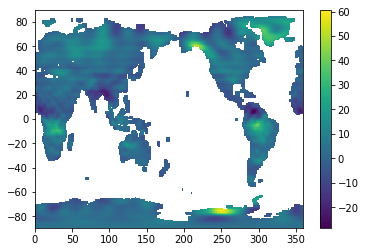

In [10]:

plt.pcolormesh(lon_gleam[:],lat_gleam[:], lwe_thickness_gleam[0])
plt.colorbar()
plt.show()

In [11]:
braz_lat= -15.9474753422
braz_long = 360 + -47.8778689831

In [12]:
def find_nearest(array, value,n=1):
    array = np.asarray(array)
    diff = np.abs(array - value)
    nearest = array[diff.argsort()][:n]
    idxs = []
    for i in range(n):
        idxs.append(np.where(array == nearest[i]))
    return np.sort(idxs)[::-1].flatten()

In [13]:
find_nearest(lat_gleam,braz_lat_long[0],4)

NameError: name 'braz_lat_long' is not defined

In [ ]:
def make_mask(src,list_x,list_y):
    src = np.asarray(src)
    mask = np.full_like(src,False,dtype=bool)

    for x in list_x:
        for y in list_y:
            mask[x,y] = True
    return mask

In [ ]:
list_x = find_nearest(lat_gleam,braz_lat_long[0],4)
list_y = find_nearest(lon_gleam,360+braz_lat_long[1],4)

In [ ]:
lwe_thickness_gleam.shape

In [ ]:
mask = make_mask(lwe_thickness_gleam[0],list_x,list_y)

In [ ]:
mask

In [ ]:
lwe_thickness_gleam[0][:].filled()[mask]

In [ ]:
def get_mean_mask(matrix, mask):
    mean = matrix[:][mask].mean()
    return mean

In [ ]:
get_mean_mask(lwe_thickness_gleam[0],mask)

In [ ]:
lista = []
for lwe_thickness in lwe_thickness_gleam:
    lista.append(get_mean_mask(lwe_thickness,mask))
    
lista

In [ ]:
def read_data(grace,lat,long,ns): 

    name = grace.as_posix()[21:24]
    
    nc = Dataset(grace, mode="r")
    
    lat_gleam = nc.variables['lat']
    lon_gleam = nc.variables['lon']
    time_gleam = nc.variables['time']
    lwe_thickness_gleam = nc.variables['lwe_thickness']
    
    time_units_gleam = nc.variables['time'].units
    
    date_gleam = num2date(time_gleam[:], time_units_gleam)
    
    dados = pd.DataFrame(index=date_gleam)
    

    for n in ns:
        name_column = name+"- %i" % n
        
        list_x = find_nearest(lat_gleam,lat,n)
        list_y = find_nearest(lon_gleam,long,n)

        mask = make_mask(lwe_thickness_gleam[0],list_x,list_y)
        column = []
        for lwe_thickness in lwe_thickness_gleam:
            column.append(get_mean_mask(lwe_thickness,mask))
        
        dados[name_column] = column
    
    
    return dados

In [ ]:
dfs = []
for grace in grace_data:
    dfs.append(read_data(grace,braz_lat,braz_long,[2,3,4]))
df = pd.concat(dfs,sort=True)
df.sort_index(inplace=True)
df.head()

In [ ]:
df = df.groupby(pd.Grouper(freq="M")).mean().dropna(how="all")

In [ ]:
def get_df(graces,station):
    dfs = []
    lat = station[lat]
    long = station[long]
    for grace in grace_data:
        dfs.append(read_data(grace,lat,long,[2,3,4]))
    df = pd.concat(dfs,sort=True)
    df = df.groupby(pd.Grouper(freq="M")).mean().dropna(how="all")
    
    df.to_csv(station.name)

In [ ]:
df.head()

In [ ]:
df.mean(axis=1)